In [1]:
import pandas as pd

In [2]:
from sklearn.ensemble import GradientBoostingClassifier
from joblib import parallel_backend
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [105]:
train_trans=pd.read_csv("Train_trans.csv")

In [106]:
from sklearn.ensemble import IsolationForest

In [107]:
iso=IsolationForest(random_state=0)
iso.fit(train_trans)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=0, verbose=0, warm_start=False)

In [108]:
pred=iso.predict(train_trans)

In [109]:
df_outlier=train_trans
df_outlier['outliers']=pred

In [110]:
df_nonOuts=df_outlier[df_outlier['outliers']!=-1]
df_nonOuts.head(5)

,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,avg_time_discharging_lag7,...,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time,use_time,fail_7,outliers
0,5.12,41.11,6.56,25.39,0.086667,-0.006667,4.37,91.70,15.70,39.12,...,377.080000,367.428750,21.696250,39.005000,4174.875000,14.200000,60.701250,543,0,1
1,36.60,5.16,6.23,6.96,0.136667,-1.296667,62.67,6.53,6.16,8.25,...,350.517857,350.309286,19.883571,32.213571,4161.000000,19.777778,52.097143,522,0,1
2,5.51,5.04,4.52,5.96,-0.460000,-0.083333,5.13,5.65,4.14,14.02,...,346.113333,343.409524,13.675238,20.471429,4152.238095,19.200000,34.146667,518,0,1
3,4.66,39.85,35.76,40.69,0.076667,-0.006667,3.93,76.37,60.86,73.53,...,356.184211,349.844737,16.306842,26.189474,4164.631579,23.625000,42.496316,548,0,1
4,5.10,43.24,4.63,5.26,0.040000,-0.153333,4.69,71.44,3.80,6.29,...,370.904000,367.730000,18.797333,30.812000,4169.800000,12.666667,49.609333,566,0,1


In [111]:
df_nonOuts_final = df_nonOuts.drop('outliers',axis=1)

In [112]:
df_nonOuts_final.head(5)

,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,avg_time_discharging_lag7,...,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time,use_time,fail_7
0,5.12,41.11,6.56,25.39,0.086667,-0.006667,4.37,91.70,15.70,39.12,...,2.375000,377.080000,367.428750,21.696250,39.005000,4174.875000,14.200000,60.701250,543,0
1,36.60,5.16,6.23,6.96,0.136667,-1.296667,62.67,6.53,6.16,8.25,...,1.000000,350.517857,350.309286,19.883571,32.213571,4161.000000,19.777778,52.097143,522,0
2,5.51,5.04,4.52,5.96,-0.460000,-0.083333,5.13,5.65,4.14,14.02,...,4.095238,346.113333,343.409524,13.675238,20.471429,4152.238095,19.200000,34.146667,518,0
3,4.66,39.85,35.76,40.69,0.076667,-0.006667,3.93,76.37,60.86,73.53,...,0.736842,356.184211,349.844737,16.306842,26.189474,4164.631579,23.625000,42.496316,548,0
4,5.10,43.24,4.63,5.26,0.040000,-0.153333,4.69,71.44,3.80,6.29,...,1.133333,370.904000,367.730000,18.797333,30.812000,4169.800000,12.666667,49.609333,566,0


In [113]:
X_train_nonOuts=df_nonOuts_final.drop('fail_7',axis=1)
Y_train_nonOuts=df_nonOuts_final['fail_7']



gbdt=GradientBoostingClassifier(random_state=0)


with parallel_backend('threading', n_jobs=-1):
    score_record=cross_val_score(gbdt,X_train_nonOuts,Y_train_nonOuts,cv=StratifiedKFold(n_splits=5, random_state=0,shuffle=True),scoring='accuracy').mean()

In [114]:
score_record

0.8154441902032993

In [115]:
df_eng=df_nonOuts_final

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

In [117]:
import re
pattern1 = ("^avg_time_charging")
match1 = []
names1 = []
for item in df_eng.columns:
    result1 = re.match(pattern1, item)
    match1.append(bool(result1))
    if bool(result1):
        names1.append(item)
names1

['avg_time_charging_lag1',
 'avg_time_charging_lag2',
 'avg_time_charging_lag3',
 'avg_time_charging_lag7',
 'avg_time_charging_lag4',
 'avg_time_charging_lag5',
 'avg_time_charging_lag6',
 'avg_time_charging_lag8',
 'avg_time_charging_lag9',
 'avg_time_charging_lag10',
 'avg_time_charging_lag11',
 'avg_time_charging_lag12',
 'avg_time_charging_lag13',
 'avg_time_charging_lag14',
 'avg_time_charging']

In [118]:
pattern2 = ("^avg_time_discharging")
match2 = []
names2 = []
for item in df_eng.columns:
    result2 = re.match(pattern2, item)
    match2.append(bool(result2))
    if bool(result2):
        names2.append(item)
names2

['avg_time_discharging_lag1',
 'avg_time_discharging_lag2',
 'avg_time_discharging_lag3',
 'avg_time_discharging_lag7',
 'avg_time_discharging_lag4',
 'avg_time_discharging_lag5',
 'avg_time_discharging_lag6',
 'avg_time_discharging_lag8',
 'avg_time_discharging_lag9',
 'avg_time_discharging_lag10',
 'avg_time_discharging_lag11',
 'avg_time_discharging_lag12',
 'avg_time_discharging_lag13',
 'avg_time_discharging_lag14',
 'avg_time_discharging']

In [119]:
pattern3 = ("^charging_rate")
match3 = []
names3 = []
for item in df_eng.columns:
    result3 = re.match(pattern3, item)
    match3.append(bool(result3))
    if bool(result3):
        names3.append(item)
names3

['charging_rate_lag3',
 'charging_rate_lag7',
 'charging_rate_lag4',
 'charging_rate_lag5',
 'charging_rate_lag6']

In [120]:
pattern4 = ("^discharging_rate")
match4 = []
names4 = []
for item in df_eng.columns:
    result4 = re.match(pattern4, item)
    match4.append(bool(result4))
    if bool(result4):
        names4.append(item)
names4

['discharging_rate_lag3',
 'discharging_rate_lag7',
 'discharging_rate_lag4',
 'discharging_rate_lag5',
 'discharging_rate_lag6',
 'discharging_rate_lag8']

In [121]:
df_eng["avg_time_charging_15"] = 0
for item in names1:
    df_eng["avg_time_charging_15"] = df_eng["avg_time_charging_15"] + df_eng[item]
df_eng["avg_time_charging_15"] = df_eng["avg_time_charging_15"] / len(names1)
df_eng["avg_time_charging_15"]

0        20.412950
1        18.356638
2        14.409683
3        15.316456
4        19.706489
           ...    
40495    13.798696
40496    18.513556
40497    14.373455
40498    14.337133
40499    18.984273
Name: avg_time_charging_15, Length: 37891, dtype: float64

In [122]:
df_eng["avg_time_discharging_15"] = 0
for item in names2:
    df_eng["avg_time_discharging_15"] = df_eng["avg_time_discharging_15"] + df_eng[item]
df_eng["avg_time_discharging_15"] = df_eng["avg_time_discharging_15"] / len(names2)
df_eng["avg_time_discharging_15"]

0        34.925667
1        28.877038
2        21.622095
3        24.809298
4        32.489467
           ...    
40495    22.841159
40496    30.079689
40497    23.099091
40498    23.221600
40499    29.001000
Name: avg_time_discharging_15, Length: 37891, dtype: float64

In [123]:
df_eng["avg_charging_rate"] = 0
for item in names3:
    df_eng["avg_charging_rate"] = df_eng["avg_charging_rate"] + df_eng[item]
df_eng["avg_charging_rate"] = df_eng["avg_charging_rate"] / len(names3)
df_eng["avg_charging_rate"]

0       -0.352000
1       -0.390667
2       -0.116667
3        0.368000
4        0.304667
           ...   
40495   -0.037333
40496   -0.202000
40497    0.347333
40498    0.115333
40499    0.300000
Name: avg_charging_rate, Length: 37891, dtype: float64

In [124]:
df_eng["avg_discharging_rate"] = 0
for item in names4:
    df_eng["avg_discharging_rate"] = df_eng["avg_discharging_rate"] + df_eng[item]
df_eng["avg_discharging_rate"] = df_eng["avg_discharging_rate"] / len(names4)
df_eng["avg_discharging_rate"]

0        0.121111
1       -1.671667
2       -0.258333
3       -0.008889
4       -0.355000
           ...   
40495    0.215556
40496    0.063333
40497   -0.678889
40498    0.011111
40499    0.017222
Name: avg_discharging_rate, Length: 37891, dtype: float64

In [125]:
df_eng.head(5)

,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,avg_time_discharging_lag7,...,avg_time_discharging,max_voltage_day,piececount,cycle_time,use_time,fail_7,avg_time_charging_15,avg_time_discharging_15,avg_charging_rate,avg_discharging_rate
0,5.12,41.11,6.56,25.39,0.086667,-0.006667,4.37,91.70,15.70,39.12,...,39.005000,4174.875000,14.200000,60.701250,543,0,20.412950,34.925667,-0.352000,0.121111
1,36.60,5.16,6.23,6.96,0.136667,-1.296667,62.67,6.53,6.16,8.25,...,32.213571,4161.000000,19.777778,52.097143,522,0,18.356638,28.877038,-0.390667,-1.671667
2,5.51,5.04,4.52,5.96,-0.460000,-0.083333,5.13,5.65,4.14,14.02,...,20.471429,4152.238095,19.200000,34.146667,518,0,14.409683,21.622095,-0.116667,-0.258333
3,4.66,39.85,35.76,40.69,0.076667,-0.006667,3.93,76.37,60.86,73.53,...,26.189474,4164.631579,23.625000,42.496316,548,0,15.316456,24.809298,0.368000,-0.008889
4,5.10,43.24,4.63,5.26,0.040000,-0.153333,4.69,71.44,3.80,6.29,...,30.812000,4169.800000,12.666667,49.609333,566,0,19.706489,32.489467,0.304667,-0.355000


In [126]:
df_plot = df_eng[['fail_7', 
                  'avg_time_charging_15', 'avg_time_discharging_15', 
                  'charging_rate_lag3', 'discharging_rate_lag3', 'avg_charging_rate', 'avg_discharging_rate', 
                  'charge_cycle_time_below_12', 'chargecycles', 'dischargecycles', 
                  'total_off_time', 'number_times_restart',
                  'avg_volt_change_charging', 'avg_volt_change_discharging','max_voltage_day', 
                  'piececount', 'cycle_time', 'use_time']]

In [126]:
df_plot = df_eng[['fail_7', 
                  'avg_time_charging_15', 'avg_time_discharging_15', 
                  'charging_rate_lag3', 'discharging_rate_lag3', 'avg_charging_rate', 'avg_discharging_rate', 
                  'charge_cycle_time_below_12', 'chargecycles', 'dischargecycles', 
                  'total_off_time', 'number_times_restart',
                  'avg_volt_change_charging', 'avg_volt_change_discharging','max_voltage_day', 
                  'piececount', 'cycle_time', 'use_time']]

Text(0.5, 1, 'Correlation Matrix Pearson Method')

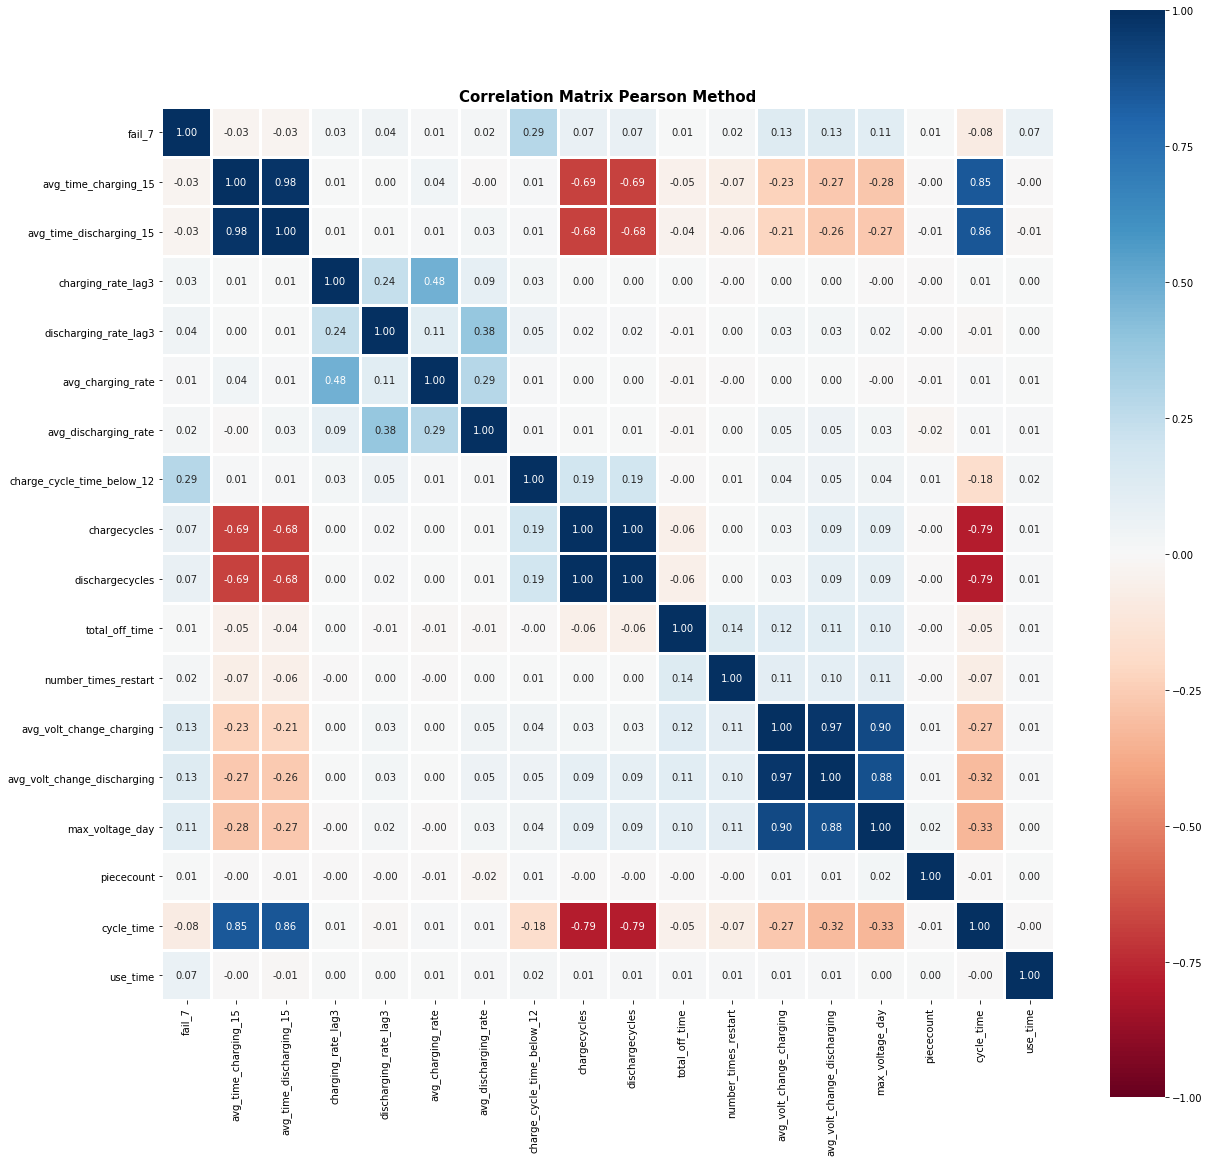

In [127]:
# Pearson Correlation Heatmap
plt.figure(figsize = (20, 20))
sns.heatmap(df_plot.corr(method = 'pearson'), annot = True, fmt = ".2f", cmap = 'RdBu', vmin = -1, vmax = 1, center = 0,
            square = True, linewidths = 2)
plt.title("Correlation Matrix Pearson Method", size = 15, weight = 'bold')

In [128]:
X_train = df_nonOuts_final.drop(['fail_7'], axis = 1)
Y_train = df_nonOuts_final['fail_7']

In [129]:
df_nonOuts_final

,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,avg_time_discharging_lag7,...,avg_time_discharging,max_voltage_day,piececount,cycle_time,use_time,fail_7,avg_time_charging_15,avg_time_discharging_15,avg_charging_rate,avg_discharging_rate
0,5.12,41.11,6.56,25.39,0.086667,-0.006667,4.37,91.70,15.70,39.12,...,39.005000,4174.875000,14.200000,60.701250,543,0,20.412950,34.925667,-0.352000,0.121111
1,36.60,5.16,6.23,6.96,0.136667,-1.296667,62.67,6.53,6.16,8.25,...,32.213571,4161.000000,19.777778,52.097143,522,0,18.356638,28.877038,-0.390667,-1.671667
2,5.51,5.04,4.52,5.96,-0.460000,-0.083333,5.13,5.65,4.14,14.02,...,20.471429,4152.238095,19.200000,34.146667,518,0,14.409683,21.622095,-0.116667,-0.258333
3,4.66,39.85,35.76,40.69,0.076667,-0.006667,3.93,76.37,60.86,73.53,...,26.189474,4164.631579,23.625000,42.496316,548,0,15.316456,24.809298,0.368000,-0.008889
4,5.10,43.24,4.63,5.26,0.040000,-0.153333,4.69,71.44,3.80,6.29,...,30.812000,4169.800000,12.666667,49.609333,566,0,19.706489,32.489467,0.304667,-0.355000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40495,4.97,5.81,5.01,29.44,-0.083333,-0.033333,7.13,5.41,5.60,49.24,...,23.077391,4162.913043,70.181818,36.957826,574,1,13.798696,22.841159,-0.037333,0.215556
40496,4.81,4.53,31.68,4.88,0.016667,-0.900000,4.71,3.99,49.68,3.42,...,28.495333,4181.600000,11.888889,46.168667,561,1,18.513556,30.079689,-0.202000,0.063333
40497,4.73,4.77,5.71,4.67,-0.020000,1.706667,3.83,3.48,4.51,3.59,...,29.766364,4157.045455,26.400000,47.638182,531,1,14.373455,23.099091,0.347333,-0.678889
40498,4.93,5.01,4.85,20.92,-0.103333,0.526667,3.35,4.30,4.12,40.14,...,22.894000,4171.650000,17.714286,37.451000,547,0,14.337133,23.221600,0.115333,0.011111


In [130]:
## load required libraries 
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from pdpbox import pdp, get_dataset, info_plots
from eli5.sklearn import PermutationImportance
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import FeatureUnion
from collections import Counter
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import warnings
import eli5
warnings.filterwarnings('ignore')
init_notebook_mode(connected = True)

In [131]:
gbdt = GradientBoostingClassifier(random_state = 0).fit(X_train, Y_train)

In [132]:
feature_importances = pd.DataFrame(gbdt.feature_importances_, index = X_train.columns, columns = ['importance'])
feature_importances = feature_importances.sort_values('importance', ascending = False)

colors = ["gray"] * 5 + ["green"] * 5
trace1 = go.Bar(y = [x.title() + "  " for x in feature_importances.index[:10][::-1]], 
                x = feature_importances.importance[:10][::-1], 
                name = "feature importance (relative)",
                marker = dict(color = colors, opacity = 0.4), orientation = "h")

data = [trace1]

layout = go.Layout(
    margin = dict(l = 400), width = 900,
    xaxis = dict(range = (0.0, 0.4)),
    title = 'Relative Feature Importance',
    barmode = 'group',
    bargap = 0.25
)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [134]:
feature_importances.head(10)

,importance
discharging_rate_lag3,0.384039
charge_cycle_time_below_12,0.356454
charging_rate_lag3,0.127867
avg_volt_change_charging,0.035832
use_time,0.018514
avg_volt_change_discharging,0.009257
total_off_time,0.004567
number_times_restart,0.004348
avg_time_discharging_lag1,0.003751
chargecycles,0.003381


Text(0.5, 1.0, '15 days average charging time')

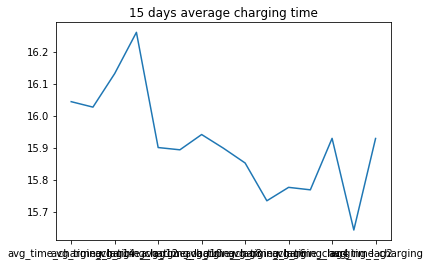

In [135]:
df_eng[['avg_time_charging_lag14', 'avg_time_charging_lag13', 'avg_time_charging_lag12', 'avg_time_charging_lag11',
       'avg_time_charging_lag10', 'avg_time_charging_lag9', 'avg_time_charging_lag8', 'avg_time_charging_lag7',
       'avg_time_charging_lag6', 'avg_time_charging_lag5', 'avg_time_charging_lag4', 'avg_time_charging_lag3',
       'avg_time_charging_lag2', 'avg_time_charging_lag1', 'avg_time_charging']].mean().plot(kind="line")
plt.title("15 days average charging time")

Text(0.5, 1.0, '15 days average discharging time')

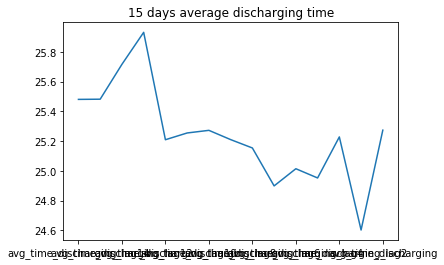

In [136]:
df_eng[['avg_time_discharging_lag14', 'avg_time_discharging_lag13', 'avg_time_discharging_lag12', 
        'avg_time_discharging_lag11', 'avg_time_discharging_lag10', 'avg_time_discharging_lag9', 
        'avg_time_discharging_lag8', 'avg_time_discharging_lag7', 'avg_time_discharging_lag6', 
        'avg_time_discharging_lag5', 'avg_time_discharging_lag4', 'avg_time_discharging_lag3',
        'avg_time_discharging_lag2', 'avg_time_discharging_lag1', 'avg_time_discharging']].mean().plot(kind="line")
plt.title("15 days average discharging time")

In [137]:
names4

['discharging_rate_lag3',
 'discharging_rate_lag7',
 'discharging_rate_lag4',
 'discharging_rate_lag5',
 'discharging_rate_lag6',
 'discharging_rate_lag8']

Text(0.5, 1.0, '5 days average charging rate')

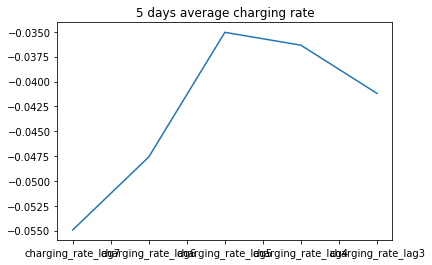

In [138]:
df_eng[['charging_rate_lag7', 'charging_rate_lag6', 'charging_rate_lag5', 
        'charging_rate_lag4', 'charging_rate_lag3']].mean().plot(kind="line")
plt.title("5 days average charging rate")

In [139]:
df_eng[['charging_rate_lag7', 'charging_rate_lag6', 'charging_rate_lag5', 
        'charging_rate_lag4', 'charging_rate_lag3']].mean()

charging_rate_lag7   -0.054938
charging_rate_lag6   -0.047585
charging_rate_lag5   -0.035044
charging_rate_lag4   -0.036337
charging_rate_lag3   -0.041191
dtype: float64

Text(0.5, 1.0, '6 days average discharging rate')

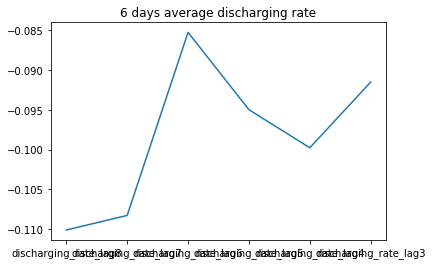

In [140]:
df_eng[['discharging_rate_lag8', 'discharging_rate_lag7', 'discharging_rate_lag6', 'discharging_rate_lag5', 
        'discharging_rate_lag4', 'discharging_rate_lag3']].mean().plot(kind="line")
plt.title("6 days average discharging rate")

In [141]:
df_eng[['discharging_rate_lag8', 'discharging_rate_lag7', 'discharging_rate_lag6', 'discharging_rate_lag5', 
        'discharging_rate_lag4', 'discharging_rate_lag3']].mean()

discharging_rate_lag8   -0.110093
discharging_rate_lag7   -0.108262
discharging_rate_lag6   -0.085277
discharging_rate_lag5   -0.094984
discharging_rate_lag4   -0.099766
discharging_rate_lag3   -0.091526
dtype: float64

In [143]:
df_eng.head(5)

,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,avg_time_discharging_lag7,...,avg_time_discharging,max_voltage_day,piececount,cycle_time,use_time,fail_7,avg_time_charging_15,avg_time_discharging_15,avg_charging_rate,avg_discharging_rate
0,5.12,41.11,6.56,25.39,0.086667,-0.006667,4.37,91.70,15.70,39.12,...,39.005000,4174.875000,14.200000,60.701250,543,0,20.412950,34.925667,-0.352000,0.121111
1,36.60,5.16,6.23,6.96,0.136667,-1.296667,62.67,6.53,6.16,8.25,...,32.213571,4161.000000,19.777778,52.097143,522,0,18.356638,28.877038,-0.390667,-1.671667
2,5.51,5.04,4.52,5.96,-0.460000,-0.083333,5.13,5.65,4.14,14.02,...,20.471429,4152.238095,19.200000,34.146667,518,0,14.409683,21.622095,-0.116667,-0.258333
3,4.66,39.85,35.76,40.69,0.076667,-0.006667,3.93,76.37,60.86,73.53,...,26.189474,4164.631579,23.625000,42.496316,548,0,15.316456,24.809298,0.368000,-0.008889
4,5.10,43.24,4.63,5.26,0.040000,-0.153333,4.69,71.44,3.80,6.29,...,30.812000,4169.800000,12.666667,49.609333,566,0,19.706489,32.489467,0.304667,-0.355000


Text(0.5, 1, 'avg_time_charging_lag vs charging_rate_lag')

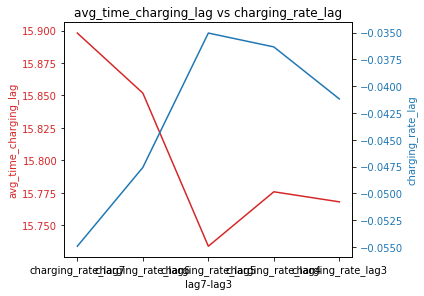

In [197]:
# Create some mock data
data1 = df_eng[['avg_time_charging_lag7',
       'avg_time_charging_lag6', 'avg_time_charging_lag5', 'avg_time_charging_lag4', 'avg_time_charging_lag3']].mean()
data2 = df_eng[['charging_rate_lag7', 'charging_rate_lag6', 'charging_rate_lag5', 
        'charging_rate_lag4', 'charging_rate_lag3']].mean()

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('lag7-lag3')
ax1.set_ylabel('avg_time_charging_lag', color=color)
ax1.plot(data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('charging_rate_lag', color=color)  # we already handled the x-label with ax1
ax2.plot(data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title("avg_time_charging_lag vs charging_rate_lag")

Text(0.5, 1, 'avg_time_discharging_lag vs discharging_rate_lag')

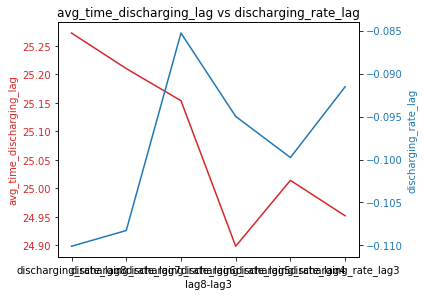

In [198]:
# Create some mock data
data1 = df_eng[['avg_time_discharging_lag8', 'avg_time_discharging_lag7', 'avg_time_discharging_lag6', 
        'avg_time_discharging_lag5', 'avg_time_discharging_lag4', 'avg_time_discharging_lag3']].mean()
data2 = df_eng[['discharging_rate_lag8', 'discharging_rate_lag7', 'discharging_rate_lag6', 'discharging_rate_lag5', 
        'discharging_rate_lag4', 'discharging_rate_lag3']].mean()

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('lag8-lag3')
ax1.set_ylabel('avg_time_discharging_lag', color=color)
ax1.plot(data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('discharging_rate_lag', color=color)  # we already handled the x-label with ax1
ax2.plot(data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title("avg_time_discharging_lag vs discharging_rate_lag")

In [160]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [161]:
dfTest = df_eng[['fail_7', 
                  'charging_rate_lag3', 'discharging_rate_lag3', 
                  'charge_cycle_time_below_12',
                  'avg_volt_change_charging', 'use_time']]

In [162]:
dfTest

,fail_7,charging_rate_lag3,discharging_rate_lag3,charge_cycle_time_below_12,avg_volt_change_charging,use_time
0,0,0.086667,-1.163333,0.0,377.080000,543
1,0,0.136667,-0.066667,0.0,350.517857,522
2,0,-0.460000,-2.643333,0.0,346.113333,518
3,0,0.076667,-0.166667,0.0,356.184211,548
4,0,0.040000,0.066667,1.0,370.904000,566
...,...,...,...,...,...,...
40495,1,-0.083333,-0.160000,1.0,365.399130,574
40496,1,0.016667,0.533333,1.0,378.554667,561
40497,1,-0.020000,0.006667,1.0,345.429091,531
40498,0,-0.103333,0.036667,1.0,364.964000,547


In [163]:
dfTest[['fail_7', 
                  'charging_rate_lag3', 'discharging_rate_lag3', 
                  'charge_cycle_time_below_12',
                  'avg_volt_change_charging', 'use_time']] = scaler.fit_transform(dfTest[['fail_7', 
                  'charging_rate_lag3', 'discharging_rate_lag3', 
                  'charge_cycle_time_below_12',
                  'avg_volt_change_charging','use_time']])

In [164]:
dfTest

,fail_7,charging_rate_lag3,discharging_rate_lag3,charge_cycle_time_below_12,avg_volt_change_charging,use_time
0,0.0,0.890524,0.365791,0.0,0.683110,0.686567
1,0.0,0.891102,0.384668,0.0,0.434650,0.582090
2,0.0,0.884205,0.340314,0.0,0.393450,0.562189
3,0.0,0.890409,0.382947,0.0,0.487652,0.711443
4,0.0,0.889985,0.386964,1.0,0.625340,0.800995
...,...,...,...,...,...,...
40495,1.0,0.888559,0.383062,1.0,0.573848,0.840796
40496,1.0,0.889715,0.394997,1.0,0.696904,0.776119
40497,1.0,0.889291,0.385931,1.0,0.387050,0.626866
40498,0.0,0.888328,0.386447,1.0,0.569778,0.706468


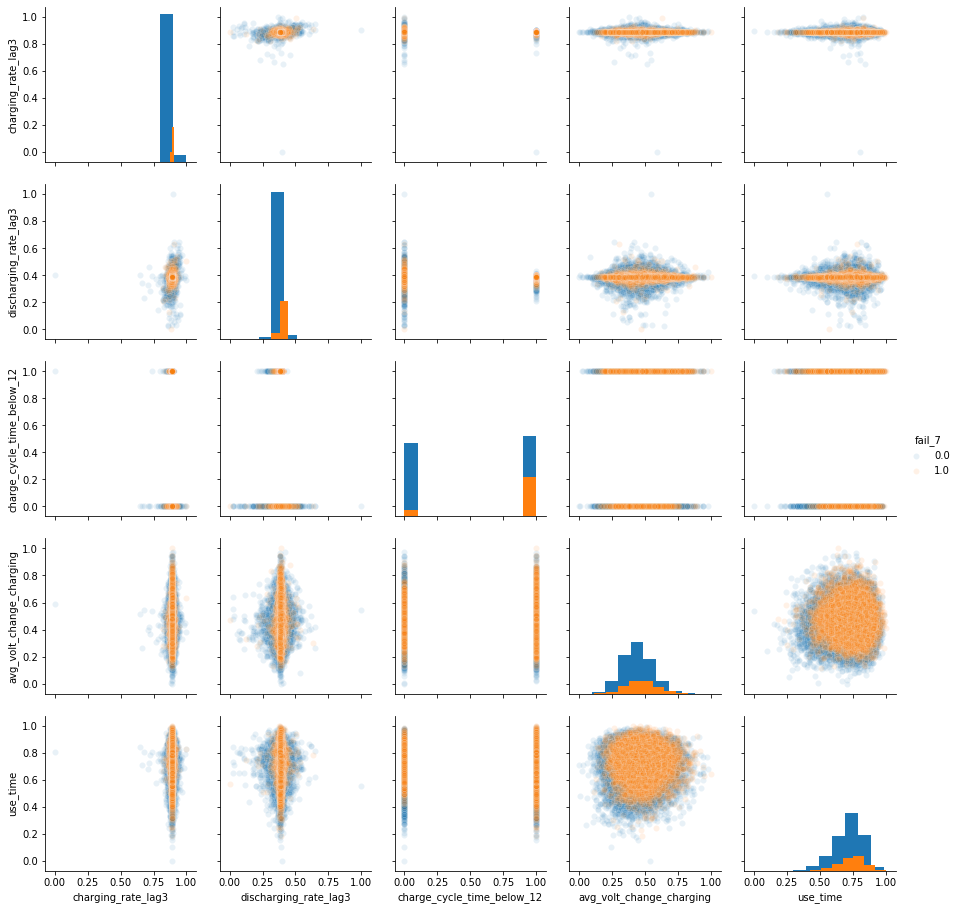

In [165]:
sns.pairplot(dfTest, hue = "fail_7", plot_kws=dict(alpha=0.1), diag_kind = "hist")

In [166]:
# Load libraries

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
#from sklearn.metrics import classification_report
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier




# Spot Check Algorithms
models = []


# Gaussian Naive Bayes
models.append(('NB', GaussianNB())) 


# Logistic regression
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))

#KNN
models.append(('KNN',KNeighborsClassifier()))

#Kernalize SVM
models.append(('SVM',SVC()))

#GBDT
models.append(('GBDT', GradientBoostingClassifier(random_state=0)))


In [167]:
#pip install joblib
from joblib import parallel_backend

In [168]:
# evaluate each model in turn
#split into 5 for cross validation 

#For int/None inputs, if the estimator is a classifier and y is either binary or multiclass, StratifiedKFold is used. In all other cases, KFold is used.
results = []
names = []
with parallel_backend('threading', n_jobs=-1):
    for name,model in models:
        kfold = StratifiedKFold(n_splits=5, random_state=0,shuffle=True)
        cv_results = cross_val_score(model, 
                                     X_train,
                                     Y_train, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        print('%s: %f (%f)' % (name,cv_results.mean(),cv_results.std()))

NB: 0.626930 (0.004786)
LR: 0.772189 (0.001611)
KNN: 0.728564 (0.003349)
SVM: 0.772109 (0.000012)
GBDT: 0.815867 (0.002132)


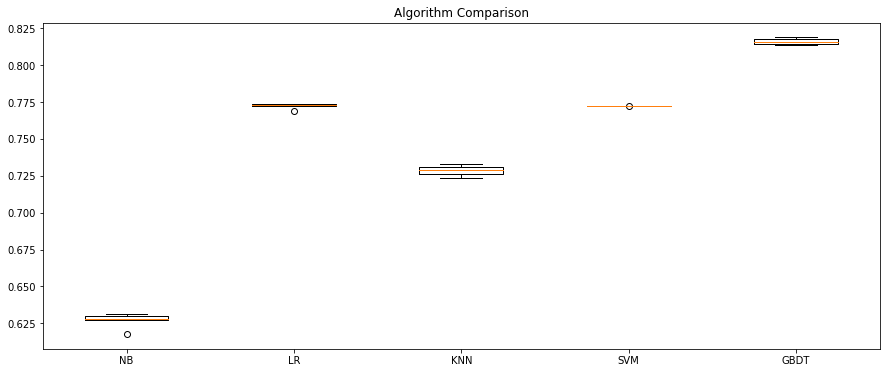

In [169]:
# Compare Algorithms
fig,ax = plt.subplots(figsize=(15,6))
ax.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show() 
#USE GBDT AS EVALUATION METHOD FOR NOW

In [171]:
core_features=['discharging_rate_lag3','charge_cycle_time_below_12','charging_rate_lag3','avg_volt_change_charging', 
               'use_time']

X_train_core=X_train[core_features]

gbdt=GradientBoostingClassifier(random_state=0)


with parallel_backend('threading', n_jobs=-1):
    score_record=cross_val_score(gbdt,X_train_core,Y_train,cv=StratifiedKFold(n_splits=5, random_state=0,shuffle=True),scoring='accuracy').mean()

In [172]:
X_train_core.head()

,discharging_rate_lag3,charge_cycle_time_below_12,charging_rate_lag3,avg_volt_change_charging,use_time
0,-1.163333,0.0,0.086667,377.080000,543
1,-0.066667,0.0,0.136667,350.517857,522
2,-2.643333,0.0,-0.460000,346.113333,518
3,-0.166667,0.0,0.076667,356.184211,548
4,0.066667,1.0,0.040000,370.904000,566


In [173]:
# 5 core
score_record

0.8165790786594801

In [174]:
X_train['dummy_12_disratelag3'] = X_train['charge_cycle_time_below_12']*X_train['discharging_rate_lag3']

In [175]:
X_train['dummy_12_avgvoltchangecharging'] = X_train['charge_cycle_time_below_12']*X_train['avg_volt_change_charging']

In [179]:
core_features_dummy1=['discharging_rate_lag3','charge_cycle_time_below_12','charging_rate_lag3','avg_volt_change_charging',
                     'use_time',
                     'dummy_12_disratelag3']

X_train_core_dummy1=X_train[core_features_dummy1]

gbdt=GradientBoostingClassifier(random_state=0)


with parallel_backend('threading', n_jobs=-1):
    score_record=cross_val_score(gbdt,X_train_core_dummy1,Y_train,cv=StratifiedKFold(n_splits=5, random_state=0,shuffle=True),scoring='accuracy').mean()

In [180]:
X_train_core_dummy1.head()

,discharging_rate_lag3,charge_cycle_time_below_12,charging_rate_lag3,avg_volt_change_charging,use_time,dummy_12_disratelag3
0,-1.163333,0.0,0.086667,377.080000,543,-0.000000
1,-0.066667,0.0,0.136667,350.517857,522,-0.000000
2,-2.643333,0.0,-0.460000,346.113333,518,-0.000000
3,-0.166667,0.0,0.076667,356.184211,548,-0.000000
4,0.066667,1.0,0.040000,370.904000,566,0.066667


In [181]:
# 5 core + 1 dummy
score_record

0.8169221805846195

In [182]:
core_features_dummy2=['discharging_rate_lag3','charge_cycle_time_below_12','charging_rate_lag3','avg_volt_change_charging',
                     'use_time',
                     'dummy_12_disratelag3', 'dummy_12_avgvoltchangecharging']

X_train_core_dummy2=X_train[core_features_dummy2]

gbdt=GradientBoostingClassifier(random_state=0)


with parallel_backend('threading', n_jobs=-1):
    score_record=cross_val_score(gbdt,X_train_core_dummy2,Y_train,cv=StratifiedKFold(n_splits=5, random_state=0,shuffle=True),scoring='accuracy').mean()

In [183]:
X_train_core_dummy2.head()

,discharging_rate_lag3,charge_cycle_time_below_12,charging_rate_lag3,avg_volt_change_charging,use_time,dummy_12_disratelag3,dummy_12_avgvoltchangecharging
0,-1.163333,0.0,0.086667,377.080000,543,-0.000000,0.000
1,-0.066667,0.0,0.136667,350.517857,522,-0.000000,0.000
2,-2.643333,0.0,-0.460000,346.113333,518,-0.000000,0.000
3,-0.166667,0.0,0.076667,356.184211,548,-0.000000,0.000
4,0.066667,1.0,0.040000,370.904000,566,0.066667,370.904


In [184]:
# 5 core + 2 dummies
score_record

0.8170805232652587

In [186]:
core_features_dummy2_1=['discharging_rate_lag3','charge_cycle_time_below_12','charging_rate_lag3','avg_volt_change_charging',
                     'use_time',
                     'dummy_12_disratelag3', 'dummy_12_avgvoltchangecharging',
                    'avg_time_discharging_lag1']

X_train_eng_core_dummy2_1=X_train[core_features_dummy2_1]

gbdt=GradientBoostingClassifier(random_state=0)


with parallel_backend('threading', n_jobs=-1):
    score_record=cross_val_score(gbdt,X_train_eng_core_dummy2_1,Y_train,cv=StratifiedKFold(n_splits=5, random_state=0,shuffle=True),scoring='accuracy').mean()

In [187]:
X_train_eng_core_dummy2_1.head()

,discharging_rate_lag3,charge_cycle_time_below_12,charging_rate_lag3,avg_volt_change_charging,use_time,dummy_12_disratelag3,dummy_12_avgvoltchangecharging,avg_time_discharging_lag1
0,-1.163333,0.0,0.086667,377.080000,543,-0.000000,0.000,4.37
1,-0.066667,0.0,0.136667,350.517857,522,-0.000000,0.000,62.67
2,-2.643333,0.0,-0.460000,346.113333,518,-0.000000,0.000,5.13
3,-0.166667,0.0,0.076667,356.184211,548,-0.000000,0.000,3.93
4,0.066667,1.0,0.040000,370.904000,566,0.066667,370.904,4.69


In [188]:
# 5 core + 2 dummy + lag1
score_record

0.8172124842048205